In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"There has been {len(cities)} randomly generated cities for this data project.")

There has been 613 randomly generated cities for this data project.


In [10]:
weather_df = pd.DataFrame(columns=['City',
                           'Cloudiness',
                           'Country',
                           'Date',
                           'Humidity',
                           'Lat',
                           'Lng',
                           'Max Temp',
                           'Wind Speed'])



In [13]:
count = 1
sets = 1
index = 0

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?q="
        units = "imperial"
        new_city = city.replace(" ", "%20")
        query_url = f"{url}{new_city}&appid={api_key}&units={units}"
        weather_json = requests.get(query_url).json()
        
        print(f"Processing Record {count} of Set {sets} | {city}")
                
        weather_df.loc[index, 'City'] = weather_json['name']
        weather_df.loc[index, 'Cloudiness'] = weather_json['clouds']['all']
        weather_df.loc[index, 'Country'] = weather_json['sys']['country']
        weather_df.loc[index, 'Date'] = weather_json['dt']
        weather_df.loc[index, 'Humidity'] = weather_json['main']['humidity']
        weather_df.loc[index, 'Lat'] = weather_json['coord']['lat']
        weather_df.loc[index, 'Lng'] = weather_json['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = weather_json['main']['temp_max']
        weather_df.loc[index, 'Wind Speed'] = weather_json['wind']['speed']
        
        index = index + 1
        
    except (KeyError, ValueError):
        print("City not found. Skipping...")
    
    count = count + 1
    
    if count == 50:
        sets = sets + 1
        count = 1 
        time.sleep(60)
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | nouadhibou
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | baoshan
Processing Record 4 of Set 1 | buzdyak
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | teguise
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | ponta delgada
Processing Record 17 of Set 1 | cuenca
Processing Record 18 of Set 1 | awjilah
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | tura
Processing Record 2

In [14]:
weather_df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [15]:
weather_df.to_csv("WeatherPy.csv", encoding="utf-8", index=False)

In [16]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nouadhibou,75,MR,1555470000,88,20.93,-17.03,62.6,19.46
1,Avarua,100,CK,1555468200,83,-21.21,-159.78,82.4,6.93
2,Baoshan,75,CN,1555471591,68,31.41,121.49,78.01,4.47
3,Buzdyak,0,RU,1555471612,52,54.57,54.53,22.01,16.96
4,Codrington,40,AU,1555471322,69,-28.95,153.24,75.2,12.75


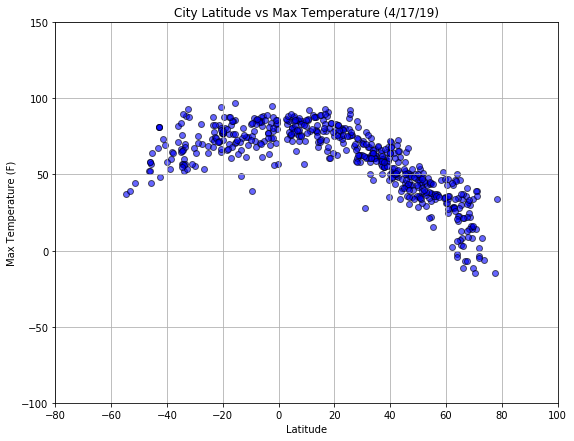

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=(9,7))
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], alpha=0.6, color='blue', edgecolor='black')

plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (4/17/19)')
plt.xlim(-80,100)
plt.ylim(-100,150)
plt.grid()
plt.show()

plt.savefig("LatvTemp.png")

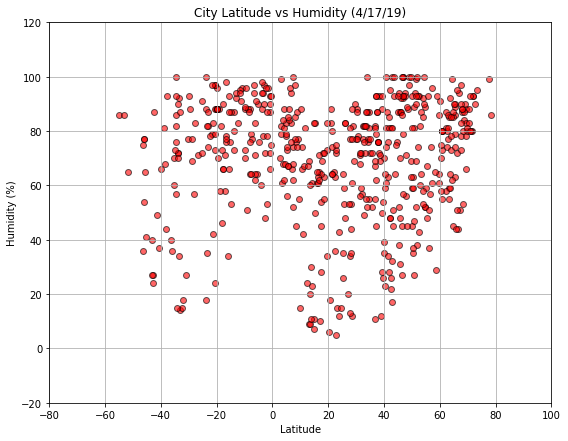

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(9,7))
plt.scatter(weather_df["Lat"], weather_df["Humidity"], alpha=0.6, color='red', edgecolor='black')

plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (4/17/19)')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid()
plt.show()

plt.savefig("LatvHumidity.png")

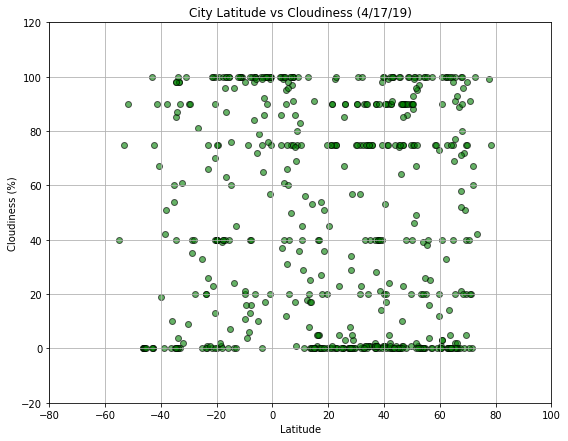

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(9,7))
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], alpha=0.6, color='green', edgecolor='black')

plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (4/17/19)')
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid()
plt.show()

plt.savefig("LatvCloudiness.png")

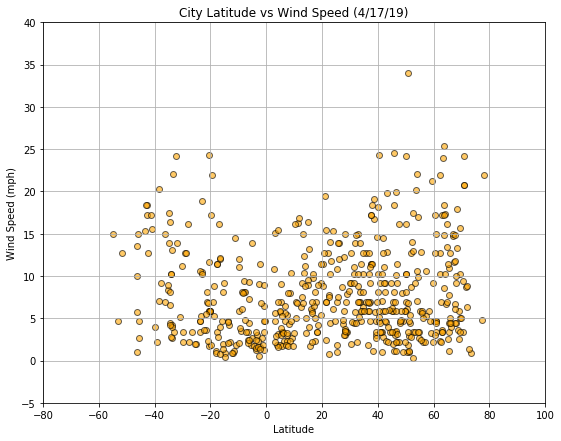

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(9,7))
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], alpha=0.6, color='orange', edgecolor='black')

plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (4/17/19)')
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.grid()
plt.show()

plt.savefig("LatvWind.png")

In [ ]:
# As you move farther from the equator, the max temp per city drops. More data points on
# the right side of the graph correlates with more cities in the northern hemisphere.

# Doesn't really seem to be a strong correlation between city latitude and humidity.
# Points are generally all over the place, but most cities have humidity above 60%.

# Cloudiness by city latitude is all over the map. Lots of place with 0 and full cloudiness.

# Majority of cities have wind speed below 10 mph without a clear correlation by latitutde. 
# More points in northern hemisphere but thats just because it is the more inhabited hemisphere.